<a href="https://colab.research.google.com/github/jaekwonkim-hmc/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [13]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
print(df)
df.isnull()


## 열별, 행별 결측치 개수 확인
df.isna().sum()
#df.isna().sum(axis=1)

## 특정 열, 행 결측치 확인
df[df.isnull().any(axis=1)]

## 결측치가 아닌 항목 확인
df.notnull()

## 결측치 비율
df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) *100


    이름    나이    도시    점수
0  김철수  25.0    서울  90.0
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN
3  최지훈  22.0    서울  80.0
4  정소희  35.0    대전  92.0


np.float64(15.0)

### 7-2 데이터 시각화를 이용한 결측치 찾기

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,678 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125082 files and dire

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

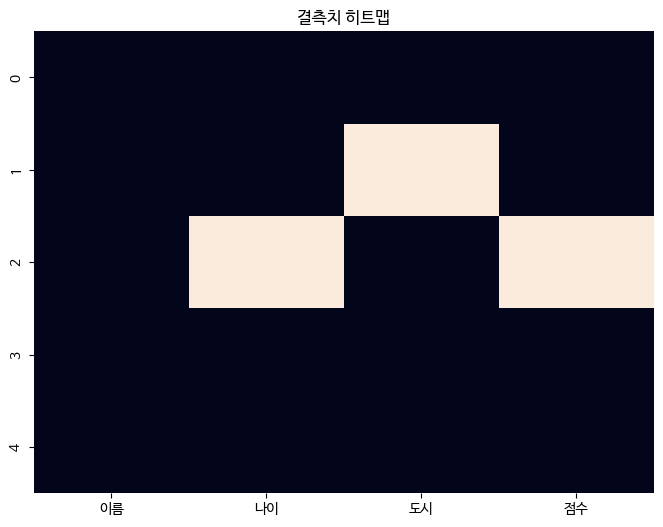

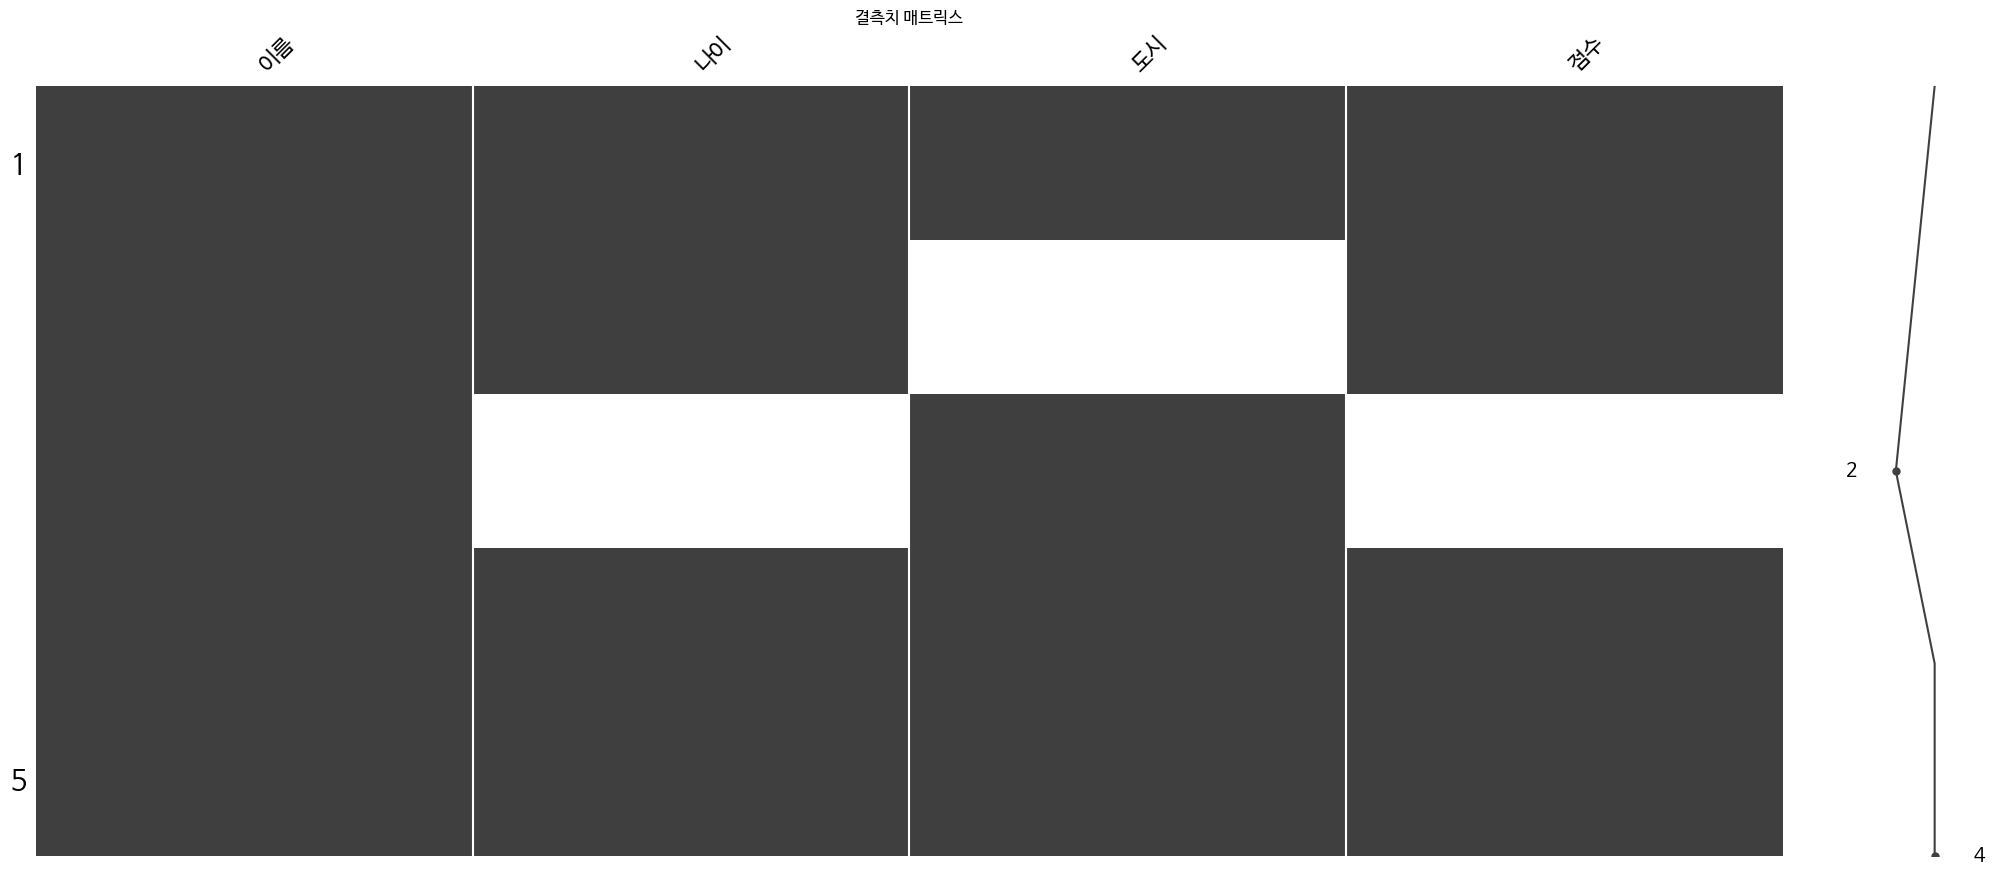

In [5]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스

msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [13]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
하한값 = q1 - 1.5 * iqr
상한값 = q3 + 1.5 * iqr

### 이상치 여부 판단
df['이상치'] = (df['점수'] < 하한값) | (df['점수'] > 상한값)


### IQR 통계량 출력
print(f"상한값: {상한값:.2f}, Q3: {q3}")
print(f"하한값: {하한값:.2f}, Q1: {q1}")
df[df['이상치']]



상한값: 117.62, Q3: 85.0
하한값: 30.62, Q1: 63.25


,학번,점수,이상치
3,1004,282,True
10,1011,22,True
13,1014,-90,True
14,1015,130,True


### 7-4 Z-점수를 통한 이상치 찾기

In [12]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
mean = df['점수'].mean()
std = df['점수'].std()
df['Z_점수'] = (df['점수'] - mean) / std

### 임계값 설정 및 이상치 여부 판단
임계값 = 2
df['이상치여부'] = df['Z_점수'].abs() > 임계값

### 이상치 데이터 출력
df[df['이상치여부']]

### 이상치 비율 출력
#df['이상치여부'].mean() * 100

,학번,점수,Z_점수,이상치여부
3,1004,282,2.861411,True
13,1014,-90,-2.268444,True


### 7-5 평균값 및 선형보간법을 통한 결측치 처리

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64


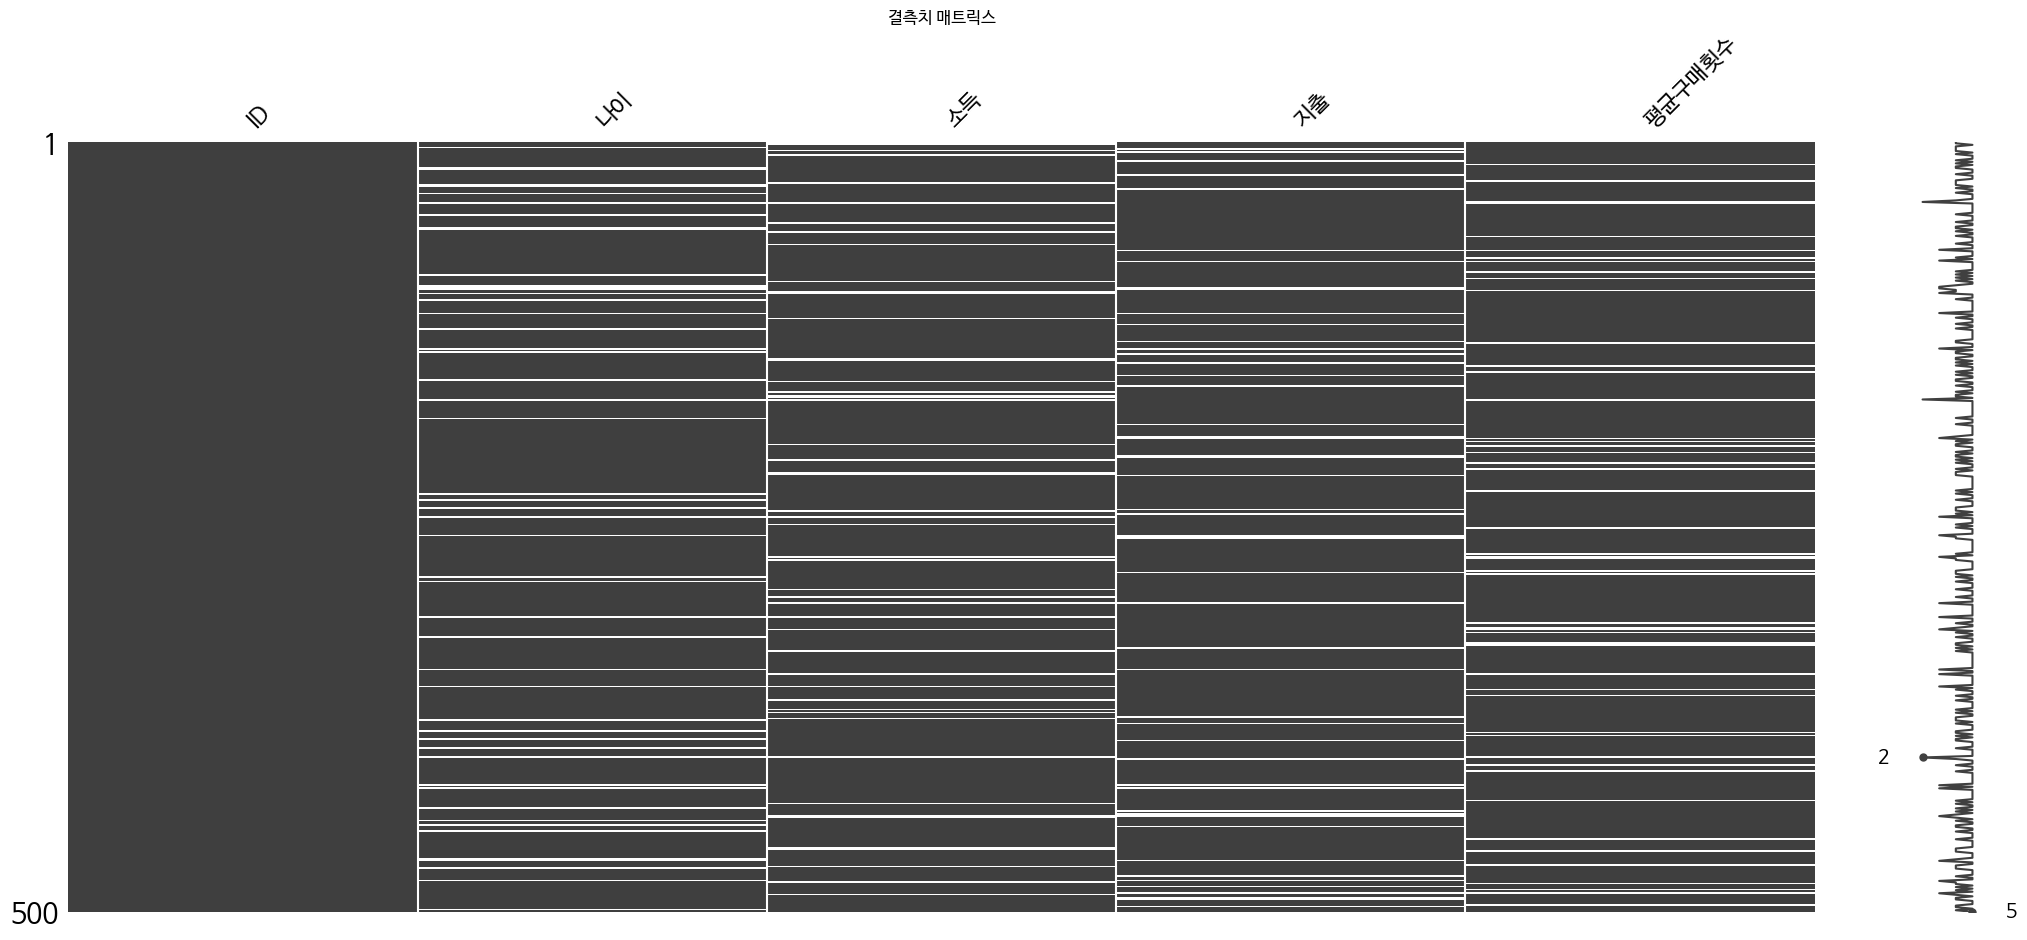

   ID    나이      소득      지출    평균구매횟수
0   1  56.0     NaN  6696.0  8.261651
1   2  69.0     NaN  6069.0  9.663844
2   3  46.0  6070.0  4800.0  9.499688
3   4   NaN  6799.0  6769.0  2.269737
4   5  60.0  3470.0     NaN  4.657531
ID         0
나이         0
소득         0
지출        34
평균구매횟수    40
dtype: int64
ID        0
나이        0
소득        0
지출        0
평균구매횟수    0
dtype: int64
   ID         나이           소득      지출    평균구매횟수
0   1  56.000000  6024.883028  6696.0  8.261651
1   2  69.000000  6024.883028  6069.0  9.663844
2   3  46.000000  6070.000000  4800.0  9.499688
3   4  44.190476  6799.000000  6769.0  2.269737
4   5  60.000000  3470.000000  5703.5  4.657531


In [21]:
import pandas as pd
import numpy as np
### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())


msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

df_cleaned = df.dropna(thresh=df.shape[1] - 1)
print(df_cleaned.head())

### 나이, 소득 평균값 대치 및 결과 출력
df_cleaned.loc[:,['나이' , '소득']] = df_cleaned[['나이' , '소득']].fillna(df_cleaned[['나이' , '소득']].mean())
print(df_cleaned.isnull().sum())

### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:,['지출' , '평균구매횟수']] = df_cleaned[['지출' , '평균구매횟수']].interpolate(method='linear')
print(df_cleaned.isnull().sum())

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")
print(df_cleaned.head())


### 7-6 DataFrame 값 변경

In [ ]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city']=df['city'].replace('Seoul', '서울')

### replace를 이용한 None -> 미정, Incheon -> 인천
df['city']=df['city'].replace([None, 'Incheon'], ['미정', '인천'])

### map을 이용한 값 변경
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}

### apply 함수를 이용한 값 변경

### apply 함수를 이용한 행단위 값 변경

### loc 인덱스를 이용한 값 변경

### where 함수를 이용한 값 변경



### 7-7 날짜 데이터 타입 다루기


In [ ]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환

### 날짜 데이터 분리

### 날짜 데이터 포멧 변경


## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

### 데이터 분포 시각화

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

### 결측치 처리

In [ ]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치



In [ ]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

In [ ]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터


plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

In [ ]:
### 제품 계열별 판매 데이터 IQR 계산


### 상한값 초과 판매량 이상치 분류


print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [ ]:
upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()


changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

### 날짜 데이터 처리

In [ ]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경



train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철


print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

In [ ]:
## 요일별 평균 판매량을 계산

## 요일 출력값 변경

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [ ]:
## 판매, 거래 데이터 통합


## 매장 데이터 통합


## 원유 데이터 통합


print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())